Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Michael Cornelisse"
STUDENT_NUMBER = "s1059020"
COLLABORATOR_NAME = "Nienke Helmers"
COLLABORATOR_STUDENT_NUMBER = "s1016904"

---

# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## **Important:** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts from the toolbox folder. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the `synth1` data into python using the `loadmat` function. Cluster the data into `K = 4` clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided `clusterPlot()` function.
 + *In Python, you can use the function `KMeans()` from the package sklearn.cluster to compute *k*-means clustering. please read the documentation of the function, as it creates an object which you can then use for clustering.*
 + *Type `clusterPlot(X,clusters,centroids,y)` to plot the data and the clustering. Don't forget to import the function from the `toolbox` folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

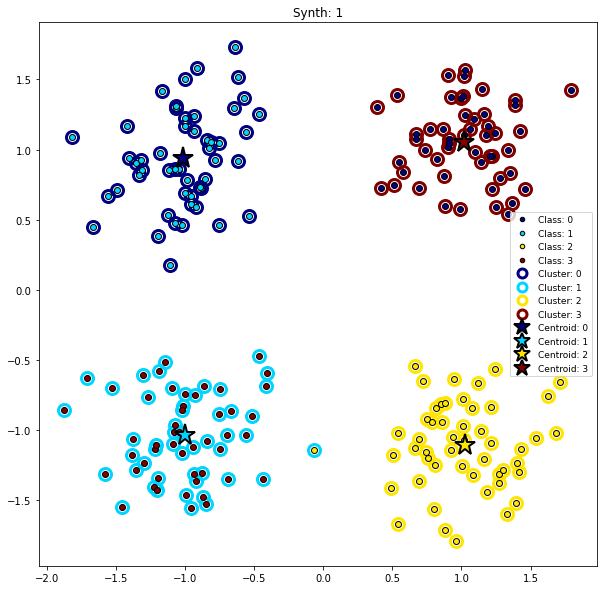

In [2]:
##Answer to question 4.1.1a
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from toolbox.clusterPlot import clusterPlot
from toolbox.clusterVal import clusterVal

synth1 = loadmat('./data/synth1.mat')

def kmeans_cluster(K, synth_data):
    K = KMeans(n_clusters=K).fit(synth_data)
    clusters = K.labels_
    centroids = K.cluster_centers_
    return clusters, centroids


def plot_kmeans(K, synth_data, synth_number):
    X = synth_data['X']
    y = synth_data['y']
    clusters, centroids = kmeans_cluster(K, X)
    plt.figure(figsize=(10, 10))
    plt.title('Synth: {}'.format(synth_number))
    clusterPlot(X, clusters, centroids, y)
    plt.show
    
plot_kmeans(4, synth1, 1)

> 4.1.1b (1 point) Cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

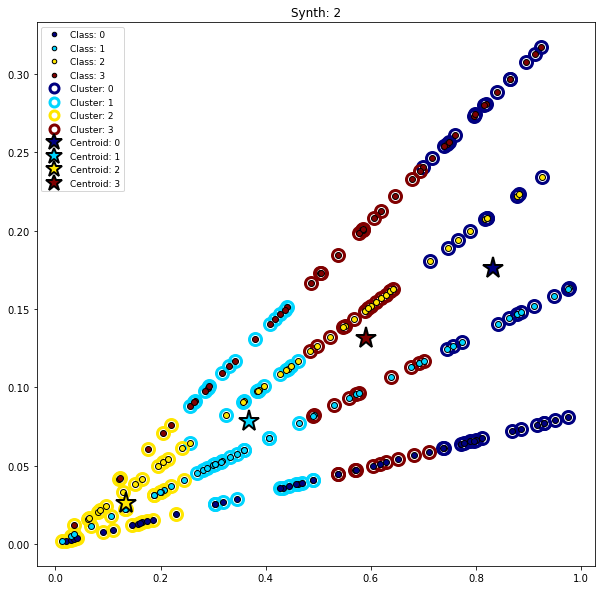

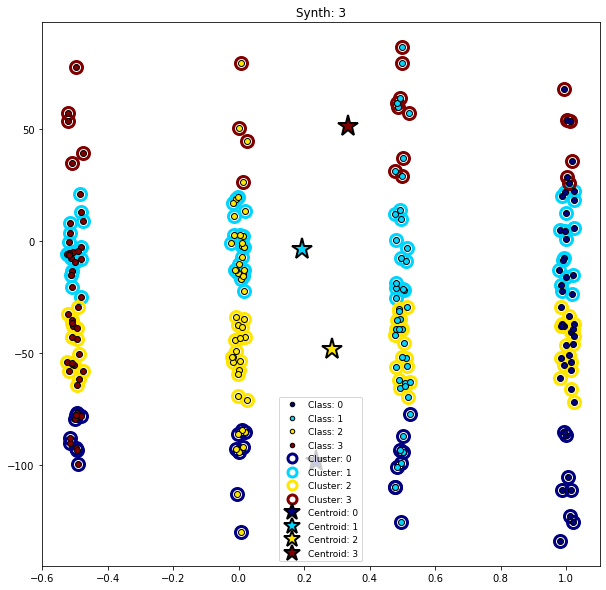

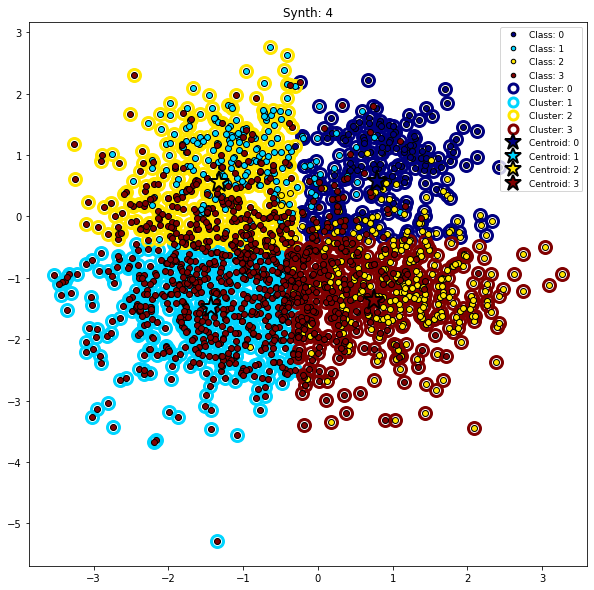

In [3]:
##Answer to question 4.1.1b
#store the synths for later use
synths = []
for i in range(4):
    synths.append(loadmat('./data/synth'+ str(i+1) + '.mat'))

# Show the plots for synth 2-4
for i in range(len(synths)):
    # We only want the synths after the first one
    if i > 0:
        plot_kmeans(4, synths[i], (i+1))

For none of the three datasets, the clustering matches the true classes:

In synth2, the classes are represented by diagonal lines, while the four clusters have a vertical orientation, exluding most of the true class data points.
For synth3 the classes are arranged vertically, but the clusters are oriented horizontally, grouping all four classes in a y-axis range together and omitting the other true class data points.
The data points for the true clases for the synth4 data are very mixed together. Combined with the globular shape of the total data set, the predicted classes do not match the true classes for a lot of the points: The points are devided over quarters of the globular shape, while the true classes are not as strictly divided.

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Perform *k*-means clustering for *K = 1, ..., 10* clusters on each of the datasets. For each value of *K* compute the four cluster validity measures mentioned above. For each dataset: plot the calculated cluster validity measures as a function of *K*. Add a legend to each figure in order to indicate which measures are plotted in which colour.
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the `toolbox folder`. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

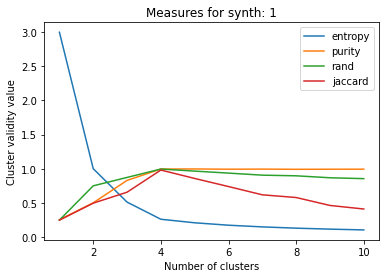

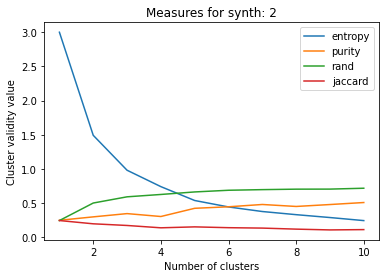

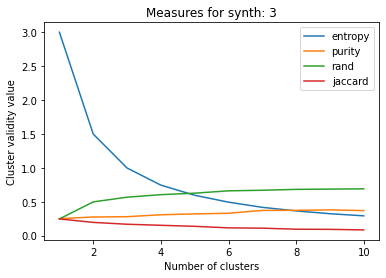

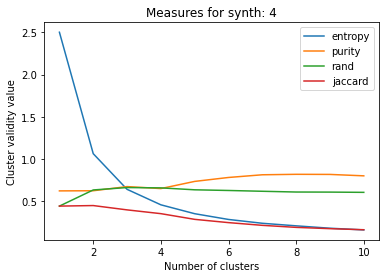

In [4]:
##Answer to question 4.1.2a
def cluster_validity(synth_data, synth_number):
    measures = []
    k_range = range(1, 11)
    
    for k in range(1, 11):
        clusters, centroids = kmeans_cluster(k, synth_data['X'])
        measures.append(clusterVal(synth_data['y'], clusters))
        
    entropy, purity, rand, jaccard = np.transpose(np.array(measures))
    plt.title('Measures for synth: {}'.format(synth_number))
    plt.xlabel('Number of clusters')
    plt.ylabel('Cluster validity value')
    plt.plot(np.array(k_range), entropy, label='entropy')
    plt.plot(np.array(k_range), purity, label='purity')
    plt.plot(np.array(k_range), rand, label='rand')
    plt.plot(np.array(k_range), jaccard, label='jaccard')
    plt.legend()
    plt.show()
       
for i in range(len(synths)):
    synth_number = (i + 1)
    cluster_validity(synths[i], synth_number)

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

The cluster validity can help select the best number of clusters using its values. For Entropy, the value should be as low as possible, while purity indicates the quality of clustering from 0 to 1. The Rand index lies between a range of -1 and 1, where 1 means perfect clustering and the jaccard index has a range between 0 and 1, with 1 also as perfect clustering. These ranges help indicate the correct number of clusters.

For this data, when more than four clusters are used to model the data, the entropy and Jaccard index decrease, while the purity and Rand index stay more or less the same. 

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by the centroid of the corresponding cluster. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, `data/wildfaces.mat` using the `loadmat` function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command `imshow(np.reshape(X[k,:],(c,x,y)).T)` which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


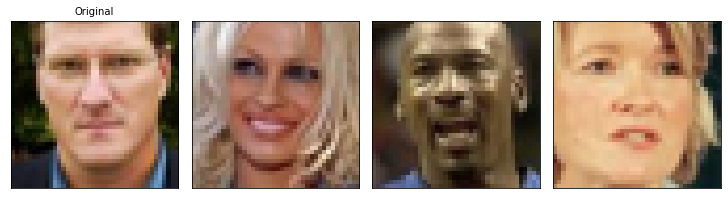

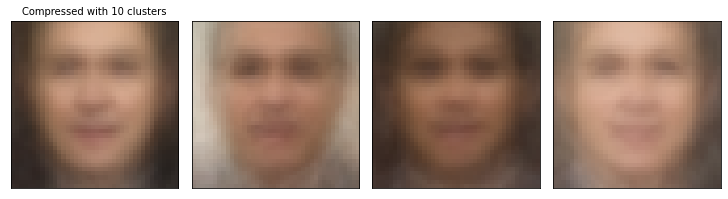

In [5]:
##Answer to question 4.1.3a
wild_faces = loadmat('./data/wildfaces')
X = wild_faces['X']

def plot_faces(faces, title):
    fig, axis = plt.subplots(1,len(faces),figsize=(10, 10),constrained_layout=True)
    axis[0].set_title(title, fontsize = 10.0)
    for i in range(len(faces)):
        axis[i].imshow(np.reshape(faces[i],(3,40,40)).T)
        axis[i].set_xticks([])
        axis[i].set_yticks([])

# General function
def compress(K, data_set, indexes):
    clusters, centroids = kmeans_cluster(K, data_set)
    centroids_to_use = []
    data_to_use = []
    for centroid in centroids[clusters[indexes]]:
        centroids_to_use.append(centroid)
    return centroids_to_use

# Generate a random sample
random_sample = [0,1,2,3]#np.random.randint(len(X), size=4)

plot_faces(X[random_sample], 'Original')

centroids = compress(10, X, random_sample)
plot_faces(centroids, 'Compressed with {} clusters'.format(10))

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

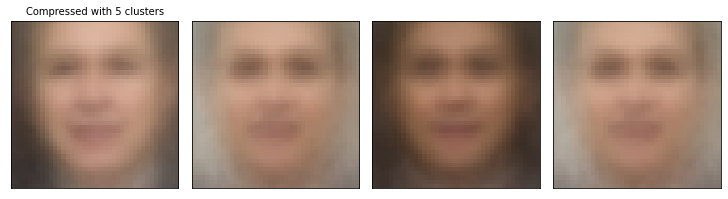

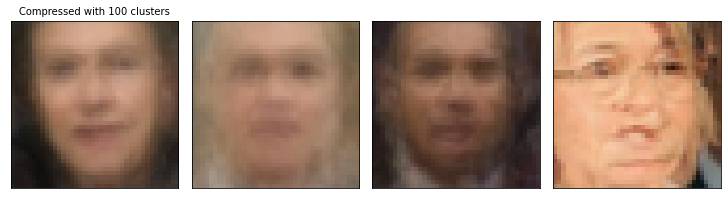

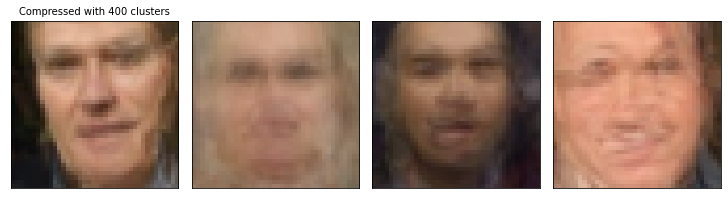

In [6]:
##Answer to question 4.1.3b
centroids = compress(5, X, random_sample)
plot_faces(centroids, 'Compressed with {} clusters'.format(5))

centroids = compress(100, X, random_sample)
plot_faces(centroids, 'Compressed with {} clusters'.format(100))

centroids = compress(400, X, random_sample)
plot_faces(centroids, 'Compressed with {} clusters'.format(400))

The higher the amount of clusters, the more recognizable the original pictures are. When the data is represented by only 10 centroids there are many pictures per centroid, leading to very blurry images. The data is then not well represented and the faces are unrecognizable. With 400 clusters there are only a few pictures per centroid, which creates pictures with overlapping faces. The images aren't terribly blurred so the original face is better recognizable in the centroid data, though the overlap causes some weird shapes.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from `data/digits`. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter `cmap=cm.binary` to the function imshow().

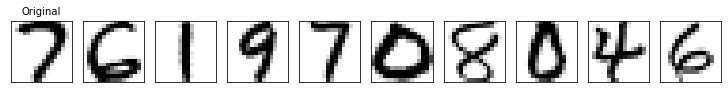

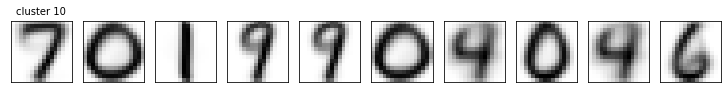

In [26]:
##Answer to question 4.1.4a
digits = loadmat('./data/digits')

X = digits['X']

def plot_digits(digits, title):
    fig, axis = plt.subplots(1,len(digits),figsize=(10, 10),constrained_layout=True)
    axis[0].set_title(title, fontsize = 10.0)
    for i in range(len(digits)):
        axis[i].imshow(np.reshape(digits[i],(16,16)), extent=(0,16,0,16), cmap= plt.cm.binary);
        axis[i].set_xticks([])
        axis[i].set_yticks([])

sample = range(90,100)

# First ten digits original
plot_digits(X[sample], 'Original')

# First ten digits cluster 10
centroids = compress(10, X, sample)
plot_digits(centroids, 'cluster {}'.format(10))

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

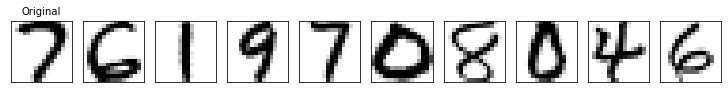

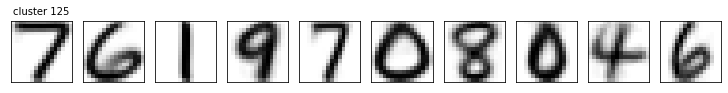

In [27]:
##Answer to question 4.1.4b
# First ten digits original
plot_digits(X[sample], 'Original')

# First ten digits cluster 50
centroids = compress(125, X, sample)
plot_digits(centroids, 'cluster {}'.format(125))

Due to the messy handwriting for the digits, the algorithm might make different clusters than expected. The 0, 1, and 3 are generally put in an accurate cluster, while there are more difficulties for the other numbers, especially 5, 7, 8 and 9 due to its similarities in shape to other numbers.

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package `scipy.cluster.hierarchy`. The function `linkage()` forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function`fcluster` extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from `data/synth1`. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function `linkage()` computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type `Z = linkage(X, method='single', metric='euclidean')` to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function `fcluster()`. For example, type `cls = fcluster(Z, criterion='maxclust', t=4)` to get a maximum of 4 clusters. Type `help(fcluster)` (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the `dendrogram()` function
+ Again, you can use the function `clusterplot()` to plot a scatter plot of the clustering.

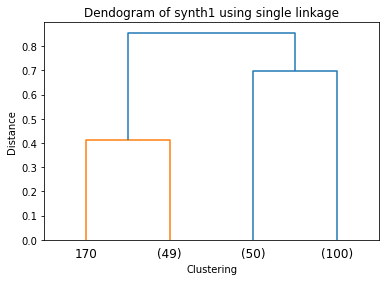

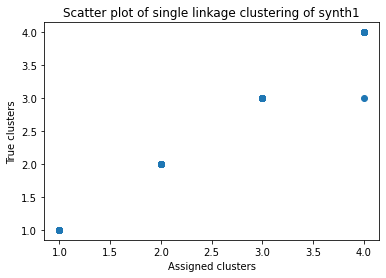

In [74]:
##Answer to question 4.2.1a
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

synth1 = loadmat('./data/synth1.mat')

def dendroscatterplot(data, data_name, method):
    X = data['X']
    y = data['y']
    Z = linkage(X, method=method, metric='euclidean')
    cls = fcluster(Z, criterion='maxclust', t=4)
    
    dendrogram(Z, p=1, truncate_mode = 'level')
    plt.xlabel('Clustering')
    plt.ylabel('Distance')
    plt.title('Dendogram of {} using {} linkage'.format(data_name,method))
    plt.show()

    plt.scatter(cls, y+1)
    plt.xlabel('Assigned clusters')
    plt.ylabel('True clusters')
    plt.title('Scatter plot of {} linkage clustering of {}'.format(method, data_name))
    plt.show()

dendroscatterplot(synth1, 'synth1', 'single')

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

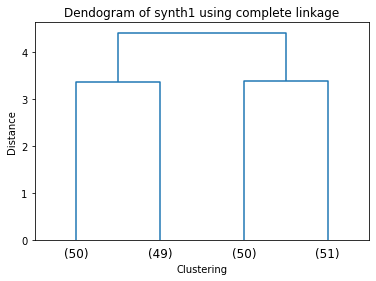

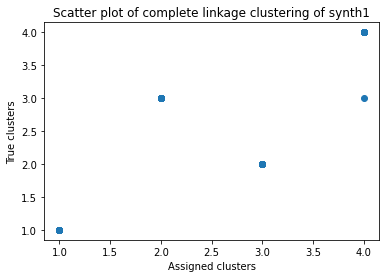

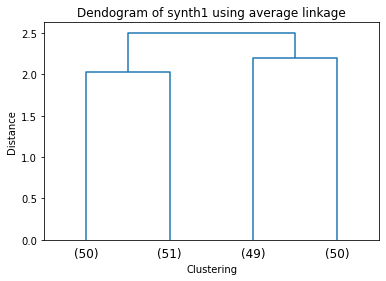

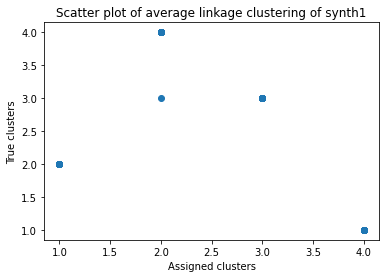

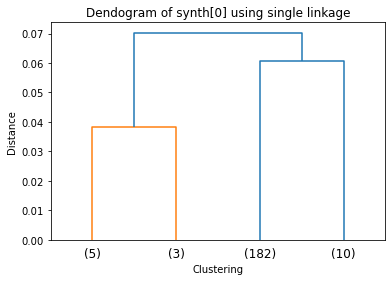

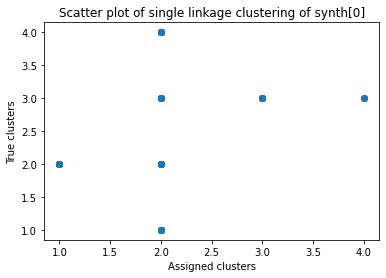

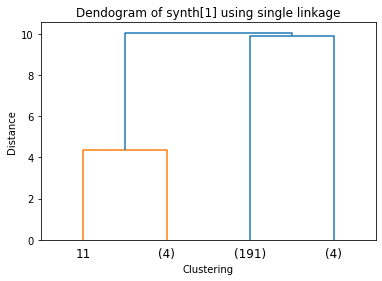

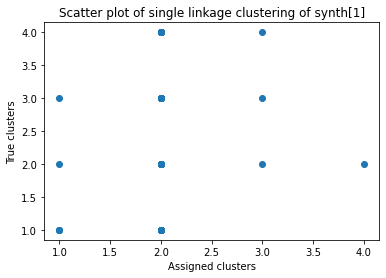

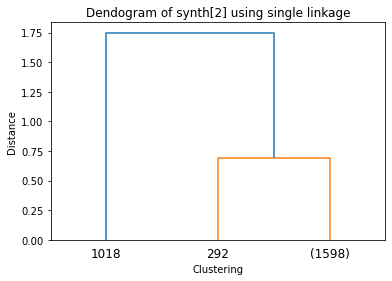

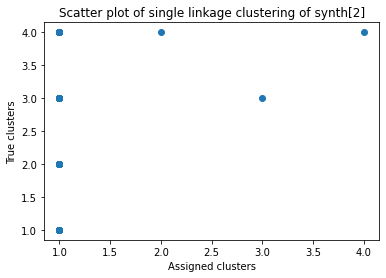

In [78]:
##Answer to question 4.2.1b
# YOUR CODE HERE
dendroscatterplot(synth1, 'synth1', 'complete')
dendroscatterplot(synth1, 'synth1', 'average')

for i in range(3):
    synth = loadmat('./data/synth'+ str(i+2) + '.mat')
    dendroscatterplot(synth, 'synth{}'.format([i]), 'single')


YOUR ANSWER HERE

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.